# Nishiak mansion_autumn_2024

# ライブラリのインポート

In [2]:
%%bash
# pip uninstall lightgbm --yes
# pip install lightgbm \
#     --no-binary lightgbm \
#     --no-cache lightgbm \
#     --config-settings=cmake.define.USE_CUDA=ON

pip install catboost -qq
pip install seaborn_qqplot -qq
pip install japanize-matplotlib optuna mojimoji optuna pymysql -qq
pip install optuna -qq
pip install optuna-integration -qq
pip install category_encoders -qq
pip install skorch -qq
pip install shirokumas -qq
pip install shap -qq
pip install jaconv -qq
pip install hydra-core -qq
pip install pyyaml -qq
# pip install wandb -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import catboost
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import functools
import datetime
from dateutil.parser import parse
import japanize_matplotlib
import optuna
import mojimoji as mjmj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import category_encoders as ce
from pathlib import Path
import os
import re
import pickle
import math
from math import sqrt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
import skorch
import torch
from torch import nn
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from skorch import NeuralNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import jaconv
import unicodedata
import hydra
import sys
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from skorch import NeuralNetRegressor
from catboost import CatBoostRegressor
from omegaconf import OmegaConf, DictConfig
import yaml

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 生データのデータフレーム化

In [30]:
class load_data_easy_clean():
    """データの前処理に関する関数群"""
    def __init__(self, tr_dir_path=None, test_file_path=None, is_tr_df=True):
        self.tr_dir_path = Path(tr_dir_path)
        self.test_file_path = Path(test_file_path)
        self.drop_cols_list = ['type', 'city_code', 'city', 'zone', 'station', 'tx_circs']
        self.rename_tr_lst = ['id', 'type', 'rigion', 'city_code', 'pref', 'city', 'zone', 'station', 'station_dist',
            'house_layout', 'area', 'land_shape', 'frontage', 'gross_area','constr_year', 'building_struct',
            'building_use', 'future_use', 'f_road_dir', 'f_road_type', 'f_road_width', 'urban_plan',
            'bc_ratio', 'fa_ratio', 'tx_date', 'reno', 'tx_circs', 'log_price']

    #     ['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
    #    '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
    #    '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
    #    '容積率（％）', '取引時点', '改装', '取引の事情等']

        self.is_tr_df=is_tr_df

    def merge_tr_data(self, tr_dir_path):
        """複数のファイルがある訓練データがあるファルダからdfを生成"""
        # 複数のファイルがあるファルダに使用
        # フォルダ内のすべてのファイルを取得
        file_list = os.listdir(tr_dir_path)
        file_list.sort()

        # CSVファイルを逐次的に読み込む
        dfs = []  # データフレームを格納するリスト

        for file_name in file_list:
            if file_name.endswith('.csv'):  # 拡張子が.csvの場合のみ処理する
                file_path = os.path.join(tr_dir_path, file_name)
                df = pd.read_csv(file_path, low_memory=False)
                dfs.append(df)

        merge_tr_df = dfs[0]
        for idx in range(1, len(dfs)):
            merge_tr_df = pd.concat([merge_tr_df, dfs[idx]], axis=0)
        merge_tr_df.reset_index(inplace=True, drop=True)
        return merge_tr_df


    def load_test_df(self, test_file_path):
        test_df = pd.read_csv(test_file_path)
        return test_df


    def rename_cols(self, df, rename_tr_lst):
        '''カラム名の分かりやすい名称に変更'''
        cols_lst = df.columns.tolist()
        rename_dict = {}
        for key, val in zip(cols_lst, rename_tr_lst):
            rename_dict[key] = val
        df.rename(columns=rename_dict, inplace=True)
        return df

    def drop_unnecessary_cols(self, tr_df, test_df):

        _tr_cols = tr_df.copy().columns.tolist()
        tr_df.drop(self.drop_cols_list, axis=1, inplace=True)
        tr_df = tr_df.dropna(how='all', axis=1)
        drop_cols = [x for x in _tr_cols if not x in tr_df.columns]
        # tr_dfのcolsに合わせてtest_dfのcolsを整える
        test_df.drop(drop_cols, axis=1, inplace=True)
        # print('after_drop_unnecessary_cols', test_df.shape)
        return (tr_df, test_df)

    def ldks_split(self, ch, num, tmp_dict, tmp_chs):
        """`house_layout`を`layout_l`,`layout_d`,`layout_k`,`layout_s`に分割"""

        if ch == 'L' and 'L' not in tmp_chs:
            tmp_dict['layout_l'].append(num)
        elif ch == 'D' and 'D' not in tmp_chs:
            tmp_dict['layout_d'].append(num)
        elif ch == 'K' and 'K' not in tmp_chs:
            tmp_dict['layout_k'].append(num)
        elif ch == 'S' and 'S' not in tmp_chs:
            tmp_dict['layout_s'].append(num)

    def prepro_cols(self, df):
        df_cols = df.columns.to_list()

        # `id`(ID))の前処理
        if "id" in df_cols:
            df['id'] = df['id'].astype(int)
        # `type`(種類))の前処理
        if "type" in df_cols:
            pass
        # `rigion`(地域))の前処理
        if "rigion" in df_cols:
            pass
        # `city_code`(市区町村コード))の前処理
        if "city_code" in df_cols:
            pass
        # `pref`(都道府県名))の前処理
        if "pref" in df_cols:
            pass
            # 人口密度、平均所得、男女比などに変換する(案)
        # `city`(市区町村名))の前処理
        if "city" in df_cols:
            pass
        # `zone`(地区名))の前処理
        if "zone" in df_cols:
            pass
        # `station`(最寄駅：名称))の前処理
        if "station" in df_cols:
            pass
        # `station_dist`(最寄駅：距離（分）))の前処理
        if "station_dist" in df_cols:
            tmp_rename_map = {"30分?60分": 45, "30分～60分": 45,
                              "1H?1H30": 75, '1H～1H30': 75,
                              "1H30?2H": 90, "1H30～2H": 90,
                              "2H?": 120, "2H～": 120}
            df['station_dist'] = df['station_dist'].replace(tmp_rename_map)
            if self.is_tr_df:
                df.dropna(subset=['station_dist'], axis=0, inplace=True)
            else:
                # print('スイッチはしている')
                tmp_mean = df.dropna(subset=['station_dist'])
                tmp_mean = int(tmp_mean['station_dist'].astype(int).mean())
                df['station_dist'].fillna(tmp_mean, inplace=True)
            df['station_dist'] = df['station_dist'].astype(int)

        # `house_layout`(間取り))の前処理
        if "house_layout" in df_cols:
            if self.is_tr_df:
                df.dropna(subset=['house_layout'], axis=0, inplace=True)
            else:
                df['house_layout'] = df['house_layout'].apply(lambda x: 'None' if pd.isna(x) else x)
            df['house_layout'] = df['house_layout'].apply(lambda x: mjmj.zen_to_han(x) if not pd.isna(x) else x)
            tmp_dict = {'layout_l': [], 'layout_d': [], 'layout_k': [], 'layout_s': []}
            for x in df['house_layout']:
                if pd.isna(x):
                    continue;
                tmp_chs = set()
                pattern = r"(\d)([A-Za-z])"
                _match = re.match(pattern, x)
                if _match:
                    num, ch = _match.groups()
                    self.ldks_split(ch, int(num), tmp_dict, tmp_chs)
                    tmp_chs.add(ch)
                    tmp_txt = x.split(_match.group())[1]
                    for xx in tmp_txt:
                        if xx in {'L', 'D', 'K', 'S'}:
                            self.ldks_split(xx, int(1), tmp_dict, tmp_chs)
                            tmp_chs.add(xx)

                tmp_chs = {'L', 'D', 'K', 'S'}.difference(tmp_chs)
                for ch in tmp_chs:
                    self.ldks_split(ch, int(0), tmp_dict, set())

            tmp_df = pd.DataFrame(tmp_dict)
            df = pd.concat([df, tmp_df],axis=1)
            df['layout_l'].fillna(df['layout_l'].mean(), inplace=True)
            df['layout_d'].fillna(df['layout_d'].mean(), inplace=True)
            df['layout_k'].fillna(df['layout_k'].mean(), inplace=True)
            df['layout_s'].fillna(df['layout_s'].mean(), inplace=True)
            df['layout_l'] = df['layout_l'].astype(int)
            df['layout_d'] = df['layout_d'].astype(int)
            df['layout_k'] = df['layout_k'].astype(int)
            df['layout_s'] = df['layout_s'].astype(int)

        # `area`(面積（㎡）))の前処理
        if "area" in df_cols:
            rename_map = {
                '2000㎡以上': 2000,
                '2,000㎡以上': 2000}
            df['area'].replace(rename_map, inplace=True)
            if self.is_tr_df:
                df.dropna(subset=['area'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['area'])
                tmp_mean = int(tmp_mean['area'].astype(int).mean())
                df['area'].fillna(tmp_mean, inplace=True)
            df["area"] = df["area"].apply(lambda x: int(x))
            # df['area'] = df['area'].astype('int')

        # `land_shape`(土地の形状))の前処理
        if "land_shape" in df_cols:
            pass

        # `frontage`(間口))の前処理
        if "frontage" in df_cols:
            pass

        # `gross_area`(延床面積（㎡）))の前処理
        if "gross_area" in df_cols:
            pass

        # `constr_year`(建築年))の前処理 => # `building_age`(築年数)の生成
        if "constr_year" in df_cols:
            y_map = {}
            num = 0
            year = 0
            for i in df['constr_year'].unique():
                if pd.isna(i):
                    num = i
                    year = float('nan')
                elif "昭和" in i:
                    num = float(i.split('昭和')[1].split('年')[0])
                    year = 98 - num
                elif "平成" in i:
                    num = float(i.split('平成')[1].split('年')[0])
                    year = 35 - num
                elif "令和" in i:
                    num = float(i.split('令和')[1].split('年')[0])
                    year = 5 - num
                elif "戦前" in i:
                    year = 78.0

                y_map[i] = year
            df['building_age'] = df['constr_year'].replace(y_map)
            df = df.drop('constr_year', axis=1)
            if self.is_tr_df:
                df.dropna(subset=['building_age'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['building_age'])
                tmp_mean = int(tmp_mean['building_age'].astype(int).mean())
                df['building_age'].fillna(tmp_mean, inplace=True)
            df['building_age'] = df['building_age'].astype(int)

        # `building_struct`(建物の構造))の前処理
        if "building_struct" in df_cols:
            # pass
            # df['building_struct'] = df['building_struct'].apply(lambda x: mjmj.zen_to_han(x) if not pd.isna(x) else x)
            df['building_struct'] = df['building_struct'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            df['building_struct'] = df['building_struct'].apply(lambda x: mjmj.zen_to_han(x))
            tmp_cols = df['building_struct'].unique().tolist()
            tmp_cols = [x for x in tmp_cols if not x in ['RC', 'SRC']]
            df['building_struct'] = df['building_struct'].replace(tmp_cols, 'その他')

        # `building_use`(用途))の前処理
        if "building_use" in df_cols:
            # pass
            df['building_use'] = df['building_use'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            df['building_use'] = df['building_use'].apply(lambda x: mjmj.zen_to_han(x))
            tmp_lst = df['building_use'].unique().tolist()
            tmp_lst = [x for x in tmp_lst if not x in ['住宅', '事務所', '店舗']]
            df['building_use'].replace(tmp_lst, 'その他', inplace=True)

        # `future_use`(今後の利用目的))の前処理
        if "future_use" in df_cols:
            # pass
            df['future_use'] = df['future_use'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            df['future_use'] = df['future_use'].apply(lambda x: 'その他' if x != '住宅' else x)

        # `f_road_dir`(前面道路：方位))の前処理
        if "f_road_dir" in df_cols:
            pass

        # `f_road_type`(前面道路：種類))の前処理
        if "f_road_type" in df_cols:
            pass

        # `f_road_width`(前面道路：幅員（ｍ）))の前処理
        if "f_road_width" in df_cols:
            pass

        # `urban_plan`(都市計画))の前処理
        if "urban_plan" in df_cols:
            # pass
            df['urban_plan'] = df['urban_plan'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            tmp_lst = df['urban_plan'].value_counts()[df['urban_plan'].value_counts() < 5000].keys().to_list()
            df['urban_plan'].replace(tmp_lst, 'その他', inplace=True)
            df['urban_plan'].replace('None', 'その他', inplace=True)

        # `bc_ratio`(建ぺい率（％）))の前処理
        if "bc_ratio" in df_cols:
            # pass
            if self.is_tr_df:
                # df.drop(df[df['bc_ratio'] == 'None'].index, axis=0, inplace=True)
                df.dropna(subset=['bc_ratio'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['bc_ratio'])
                tmp_mean = int(tmp_mean['bc_ratio'].astype(int).mean())
                df['bc_ratio'].fillna(tmp_mean, inplace=True)
            df['bc_ratio'] = df['bc_ratio'].astype(int)

        # `fa_ratio`(容積率（％）))の前処理
        if "fa_ratio" in df_cols:
            # pass
            if self.is_tr_df:
                # df.drop(df[df['fa_ratio'] == 'None'].index, axis=0, inplace=True)
                df.dropna(subset=['fa_ratio'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['fa_ratio'])
                tmp_mean = int(tmp_mean['fa_ratio'].astype(int).mean())
                df['fa_ratio'].fillna(tmp_mean, inplace=True)
            df['fa_ratio'] = df['fa_ratio'].astype(int)

        # `tx_date`(取引時点))の前処理
        if "tx_date" in df_cols:
            df['tx_date'] = df['tx_date'].apply(lambda x: re.search(r"第(\d+)四半期", x).group(0))

        # `reno`(改装))の前処理
        if "reno" in df_cols:
            # pass
            df['reno'].replace(np.nan, 'NaN', inplace=True)

        # `tx_circs`(取引の事情等))の前処理
        if "tx_circs" in df_cols:
            pass
        # 目的変数`log_price`(取引価格（総額）_log))の前処理

        return df


    def save_prepro_data(self, obj, file_name):
        save_dir = Path('/content/drive/MyDrive/nishika/mansion_winter_2023/data/prepro')
        save_dir.mkdir(parents=True, exist_ok=True)
        save_path = save_dir / f'prepro_{file_name}.pkl'
        with open(save_path, 'wb') as p:
            pickle.dump(obj, p)

    def main_exe(self):
        tr_df = self.merge_tr_data(self.tr_dir_path)
        test_df = self.load_test_df(self.test_file_path)
        rename_test_lst = self.rename_tr_lst.copy()
        rename_test_lst.remove(f'log_price')
        tr_df = self.rename_cols(tr_df, self.rename_tr_lst)
        test_df = self.rename_cols(test_df, rename_test_lst)
        tr_df, test_df = self.drop_unnecessary_cols(tr_df, test_df)
        tr_df = self.prepro_cols(tr_df)
        tr_df.reset_index(inplace=True, drop=True)
        self.is_tr_df = False
        test_df = self.prepro_cols(test_df)
        test_df.reset_index(inplace=True, drop=True)

        # for x in [(tr_df, 'tr_data'), (test_df, 'test_data')]:
        #     self.save_prepro_data(x[0], x[1])

        return (tr_df, test_df)

    def sub_exe(self):
        tr_df = self.merge_tr_data(self.tr_dir_path)
        test_df = self.load_test_df(self.test_file_path)
        rename_test_lst = self.rename_tr_lst.copy()
        rename_test_lst.remove('log_price')
        tr_df = self.rename_cols(tr_df, self.rename_tr_lst)
        test_df = self.rename_cols(test_df, rename_test_lst)

        return (tr_df, test_df)

### 予備

In [ ]:
# class DataPreprocessing():
#     """データの前処理に関する関数群"""
#     def __init__(self, tr_dir_path=None, test_file_path=None, is_tr_df=True):
#         self.tr_dir_path = Path(tr_dir_path)
#         self.test_file_path = Path(test_file_path)
#         self.drop_cols_list = ['type', 'city_code', 'city', 'zone', 'station', 'tx_circs']
#         self.rename_tr_lst = ['id', 'type', 'rigion', 'city_code', 'pref', 'city', 'zone', 'station', 'station_dist',
#             'house_layout', 'area', 'land_shape', 'frontage', 'gross_area','constr_year', 'building_struct',
#             'building_use', 'future_use', 'f_road_dir', 'f_road_type', 'f_road_width', 'urban_plan',
#             'bc_ratio', 'fa_ratio', 'tx_date', 'reno', 'tx_circs', 'log_price']

#     #     ['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
#     #    '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
#     #    '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
#     #    '容積率（％）', '取引時点', '改装', '取引の事情等']

#         self.is_tr_df=is_tr_df

#     def merge_tr_data(self, tr_dir_path):
#         """複数のファイルがある訓練データがあるファルダからdfを生成"""
#         # 複数のファイルがあるファルダに使用
#         # フォルダ内のすべてのファイルを取得
#         file_list = os.listdir(tr_dir_path)
#         file_list.sort()

#         # CSVファイルを逐次的に読み込む
#         dfs = []  # データフレームを格納するリスト

#         for file_name in file_list:
#             if file_name.endswith('.csv'):  # 拡張子が.csvの場合のみ処理する
#                 file_path = os.path.join(tr_dir_path, file_name)
#                 df = pd.read_csv(file_path, low_memory=False)
#                 dfs.append(df)

#         merge_tr_df = dfs[0]
#         for idx in range(1, len(dfs)):
#             merge_tr_df = pd.concat([merge_tr_df, dfs[idx]], axis=0)
#         merge_tr_df.reset_index(inplace=True, drop=True)
#         return merge_tr_df


#     def load_test_df(self, test_file_path):
#         test_df = pd.read_csv(test_file_path)
#         return test_df


#     def rename_cols(self, df, rename_tr_lst):
#         '''カラム名の分かりやすい名称に変更'''
#         cols_lst = df.columns.tolist()
#         rename_dict = {}
#         for key, val in zip(cols_lst, rename_tr_lst):
#             rename_dict[key] = val
#         df.rename(columns=rename_dict, inplace=True)
#         return df

#     def drop_unnecessary_cols(self, tr_df, test_df):

#         _tr_cols = tr_df.copy().columns.tolist()
#         tr_df.drop(self.drop_cols_list, axis=1, inplace=True)
#         tr_df = tr_df.dropna(how='all', axis=1)
#         drop_cols = [x for x in _tr_cols if not x in tr_df.columns]
#         # tr_dfのcolsに合わせてtest_dfのcolsを整える
#         test_df.drop(drop_cols, axis=1, inplace=True)
#         # print('after_drop_unnecessary_cols', test_df.shape)
#         return (tr_df, test_df)

#     def ldks_split(self, ch, num, tmp_dict, tmp_chs):
#         """`house_layout`を`layout_l`,`layout_d`,`layout_k`,`layout_s`に分割"""

#         if ch == 'L' and 'L' not in tmp_chs:
#             tmp_dict['layout_l'].append(num)
#         elif ch == 'D' and 'D' not in tmp_chs:
#             tmp_dict['layout_d'].append(num)
#         elif ch == 'K' and 'K' not in tmp_chs:
#             tmp_dict['layout_k'].append(num)
#         elif ch == 'S' and 'S' not in tmp_chs:
#             tmp_dict['layout_s'].append(num)

#     def prepro_cols(self, df):
#         df_cols = df.columns.to_list()

#         # `id`(ID))の前処理
#         if "id" in df_cols:
#             df['id'] = df['id'].astype(int)
#         # `type`(種類))の前処理
#         if "type" in df_cols:
#             pass
#         # `rigion`(地域))の前処理
#         if "rigion" in df_cols:
#             pass
#         # `city_code`(市区町村コード))の前処理
#         if "city_code" in df_cols:
#             pass
#         # `pref`(都道府県名))の前処理
#         if "pref" in df_cols:
#             pass
#             # 人口密度、平均所得、男女比などに変換する(案)
#         # `city`(市区町村名))の前処理
#         if "city" in df_cols:
#             pass
#         # `zone`(地区名))の前処理
#         if "zone" in df_cols:
#             pass
#         # `station`(最寄駅：名称))の前処理
#         if "station" in df_cols:
#             pass
#         # `station_dist`(最寄駅：距離（分）))の前処理
#         if "station_dist" in df_cols:
#             pass

#         # df.fillna('None', inplace=True) #いきなり全部置換するのは？

#         # `station_dist`(間取り))の前処理
#         if "station_dist" in df_cols:
#             # tmp_lst = df['station_dist'][~df['station_dist'].isin([x for x in df['station_dist'].unique().astype(str).tolist() if str.isdigit(x)])].unique().tolist()
#             # rename_lst = ['45', '75', '120', '105', 'None']

#             tmp_rename_map = {"30分?60分": 45, "1H?1H30": 75, "1H30?2H": 90, "2H?": 120}
#             df['station_dist'] = df['station_dist'].replace(tmp_rename_map)
#             # 指定の名前に一括で変換するためにnanを一旦'None'に変換したが、dropnaしたいために再びNoneだけnanに戻す。
#             # df['station_dist'] = df['station_dist'][df['station_dist'] != 'None']
#             # # print('after_station_dist', df.shape)
#             # if self.is_tr_df:
#             #     df.dropna(subset=['station_dist'], axis=0, inplace=True)
#             # else:
#             #     # print('スイッチはしている')
#             #     tmp_mean = df.dropna(subset=['station_dist'])
#             #     tmp_mean = int(tmp_mean['station_dist'].astype(int).mean())
#             #     df['station_dist'].fillna(tmp_mean, inplace=True)
#             # df['station_dist'] = df['station_dist'].astype(int)
#             # print('after_station_dist', df.shape)

#         # `house_layout`(間取り))の前処理
#         if "house_layout" in df_cols:
#         # if self.is_tr_df:
#         #     # df['house_layout'].dropna(subset=['house_layout'], axis=1, inplace=True)
#         #     df['house_layout'] = df['house_layout'].apply(lambda x: 'None' if pd.isna(x) else x)
#             # if self.is_tr_df:
#             #     df.dropna(subset=['house_layout'], axis=0, inplace=True)
#             # else:
#             #     df['house_layout'] = df['house_layout'].apply(lambda x: 'None' if pd.isna(x) else x)
#             df['house_layout'] = df['house_layout'].apply(lambda x: mjmj.zen_to_han(x) if not pd.isna(x) else x)
#             # print(df['house_layout'].unique())
#             # df.dropna(subset=['house_layout'], inplace=True)
#             # tmp_is_none = []
#             tmp_dict = {'layout_l': [], 'layout_d': [], 'layout_k': [], 'layout_s': []}
#             for x in df['house_layout']:
#                 if pd.isna(x):
#                     continue;
#                 tmp_chs = set()
#                 pattern = r"(\d)([A-Za-z])"
#                 _match = re.match(pattern, x)
#                 if _match:
#                     num, ch = _match.groups()
#                     self.ldks_split(ch, int(num), tmp_dict, tmp_chs)
#                     tmp_chs.add(ch)
#                     tmp_txt = x.split(_match.group())[1]
#                     for xx in tmp_txt:
#                         if xx in {'L', 'D', 'K', 'S'}:
#                             self.ldks_split(xx, int(1), tmp_dict, tmp_chs)
#                             tmp_chs.add(xx)
#                     # tmp_chs = {'L', 'D', 'K', 'S'}.difference(tmp_chs)
#                     # for ch in tmp_chs:
#                     #     self.ldks_split(ch, int(0), tmp_dict, set())

#                 tmp_chs = {'L', 'D', 'K', 'S'}.difference(tmp_chs)
#                 for ch in tmp_chs:
#                     self.ldks_split(ch, int(0), tmp_dict, set())

#             # df.drop('house_layout', axis=1, inplace=True)
#             tmp_df = pd.DataFrame(tmp_dict)
#             df = pd.concat([df, tmp_df],axis=1)
#             # condition = (df['layout_l'] == 0) & (df['layout_d'] == 0) & (df['layout_k'] == 0) & (df['layout_s'] == 0)
#             # df.loc[condition, 'layout_l'] = df['layout_l'].mean()
#             # df.loc[condition, 'layout_d'] = df['layout_d'].mean()
#             # df.loc[condition, 'layout_k'] = df['layout_k'].mean()
#             # df.loc[condition, 'layout_s'] = df['layout_s'].mean()

#             # df['layout_l'].fillna(df['layout_l'].mean(), inplace=True)
#             # df['layout_d'].fillna(df['layout_d'].mean(), inplace=True)
#             # df['layout_k'].fillna(df['layout_k'].mean(), inplace=True)
#             # df['layout_s'].fillna(df['layout_s'].mean(), inplace=True)
#             # df['layout_l'] = df['layout_l'].astype(int)
#             # df['layout_d'] = df['layout_d'].astype(int)
#             # df['layout_k'] = df['layout_k'].astype(int)
#             # df['layout_s'] = df['layout_s'].astype(int)
#             # print('after_houselayout', df.shape)

#         # `area`(面積（㎡）))の前処理
#         if "area" in df_cols:
#             df['area'].replace('2000㎡以上', 2000, inplace=True)
#             # if self.is_tr_df:
#             #     df.dropna(subset=['area'], axis=0, inplace=True)
#             # else:
#             #     tmp_mean = df.dropna(subset=['area'])
#             #     tmp_mean = int(tmp_mean['area'].astype(int).mean())
#             #     df['area'].fillna(tmp_mean, inplace=True)
#             # df['area'] = df['area'].astype('int')
#             # print('after_areat', df.shape)

#         # `land_shape`(土地の形状))の前処理
#         if "land_shape" in df_cols:
#             pass

#         # `frontage`(間口))の前処理
#         if "frontage" in df_cols:
#             pass

#         # `gross_area`(延床面積（㎡）))の前処理
#         if "gross_area" in df_cols:
#             pass

#         # `constr_year`(建築年))の前処理 => # `building_age`(築年数)の生成
#         if "constr_year" in df_cols:
#             # df['const_year'] = df['const_year'].apply(lambda x: 'None' if pd.isna(x) else x)
#             y_map = {}
#             num = 0
#             year = 0
#             for i in df['constr_year'].unique():
#                 if pd.isna(i):
#                     num = i
#                     year = float('nan')
#                 elif "昭和" in i:
#                     num = float(i.split('昭和')[1].split('年')[0])
#                     year = 98 - num
#                 elif "平成" in i:
#                     num = float(i.split('平成')[1].split('年')[0])
#                     year = 35 - num
#                 elif "令和" in i:
#                     num = float(i.split('令和')[1].split('年')[0])
#                     year = 5 - num
#                 elif "戦前" in i:
#                     year = 78.0

#                 y_map[i] = year
#             df['building_age'] = df['constr_year'].replace(y_map)
#             # df = df.drop('constr_year', axis=1)
#             # if self.is_tr_df:
#             #     df.dropna(subset=['building_age'], axis=0, inplace=True)
#             # else:
#             #     tmp_mean = df.dropna(subset=['building_age'])
#             #     tmp_mean = int(tmp_mean['building_age'].astype(int).mean())
#             #     df['building_age'].fillna(tmp_mean, inplace=True)
#             # df['building_age'] = df['building_age'].astype(int)
#             # print('after_build_age', df.shape)

#         # `building_struct`(建物の構造))の前処理
#         if "building_struc" in df_cols:
#         # nanはその他に分類する
#             # df['building_struct'] = df['building_struct'].apply(lambda x: 'None' if pd.isna(x) else x)
#             # df['building_struct'] = df['building_struct'].apply(lambda x: mjmj.zen_to_han(x))
#             # tmp_cols = df['building_struct'].unique().tolist()
#             # tmp_cols = [x for x in tmp_cols if not x in ['RC', 'SRC']]
#             # df['building_struct'] = df['building_struct'].replace(tmp_cols, 'その他')
#             pass
#             # print('after_building_struct', df.shape)
#         # df['building_struct'] = df['building_struct'].astype('category')

#         # `building_use`(用途))の前処理
#         # zen_to_hanに通すためにnanを'None'に変換する
#         # nanはその他に分類する
#         if "building_use" in df_cols:
#             # df['building_use'] = df['building_use'].apply(lambda x: 'None' if pd.isna(x) else x)
#             # df['building_use'] = df['building_use'].apply(lambda x: mjmj.zen_to_han(x))
#             # tmp_lst = df['building_use'].unique().tolist()
#             # tmp_lst = [x for x in tmp_lst if not x in ['住宅', '事務所', '店舗']]
#             # df['building_use'].replace(tmp_lst, 'その他', inplace=True)
#             # df['building_use'] = df['building_use'].astype('category')
#             # print('building_use', df.shape)
#             pass
#         # `future_use`(今後の利用目的))の前処理
#         # nanはその他に分類する
#         if "future_use" in df_cols:
#             # df['future_use'] = df['future_use'].apply(lambda x: 'None' if pd.isna(x) else x)
#             # df['future_use'] = df['future_use'].apply(lambda x: 'その他' if x != '住宅' else x)
#             pass
#         # df['future_use'] = df['future_use'].astype('category')

#         # `f_road_dir`(前面道路：方位))の前処理
#         if "f_road_dir" in df_cols:
#             pass

#         # `f_road_type`(前面道路：種類))の前処理
#         if "f_road_type" in df_cols:
#             pass

#         # `f_road_width`(前面道路：幅員（ｍ）))の前処理
#         if "f_road_width" in df_cols:
#             pass

#         # `urban_plan`(都市計画))の前処理
#         # nanはその他に分類する
#         if "urban_plan" in df_cols:
#             # df['urban_plan'] = df['urban_plan'].apply(lambda x: 'None' if pd.isna(x) else x)
#             # tmp_lst = df['urban_plan'].value_counts()[df['urban_plan'].value_counts() < 5000].keys().to_list()
#             # df['urban_plan'].replace(tmp_lst, 'その他', inplace=True)
#             # df['urban_plan'].replace('None', 'その他', inplace=True)
#             pass
#         # df['urban_plan'] = df['urban_plan'].astype('category')

#         # `bc_ratio`(建ぺい率（％）))の前処理
#         if "bc_ratio" in df_cols:
#             # 'bc_ratio', 'fa_ratio'の欠損値のレコードは一致している。
#             # df.dropna(subset=['bc_ratio', 'fa_ratio'], inplace=True)
#             # df[['bc_ratio', 'fa_ratio']] = df[['bc_ratio', 'fa_ratio']][df[['bc_ratio', 'fa_ratio']]!='None']
#             # if self.is_tr_df:
#             #     # df.drop(df[df['bc_ratio'] == 'None'].index, axis=0, inplace=True)
#             #     df.dropna(subset=['bc_ratio'], axis=0, inplace=True)
#             # else:
#             #     tmp_mean = df.dropna(subset=['bc_ratio'])
#             #     tmp_mean = int(tmp_mean['bc_ratio'].astype(int).mean())
#             #     df['bc_ratio'].fillna(tmp_mean, inplace=True)
#             # df['bc_ratio'] = df['bc_ratio'].astype(int)
#             pass

#         # `fa_ratio`(容積率（％）))の前処理
#         if "fa_ratio" in df_cols:
#             # df.drop(df[df['fa_ratio'] == 'None'].index, axis=0, inplace=True)
#             # if self.is_tr_df:
#             #     # df.drop(df[df['fa_ratio'] == 'None'].index, axis=0, inplace=True)
#             #     df.dropna(subset=['fa_ratio'], axis=0, inplace=True)
#             # else:
#             #     tmp_mean = df.dropna(subset=['fa_ratio'])
#             #     tmp_mean = int(tmp_mean['fa_ratio'].astype(int).mean())
#             #     df['fa_ratio'].fillna(tmp_mean, inplace=True)
#             # df['fa_ratio'] = df['fa_ratio'].astype(int)
#             pass

#         # `tx_date`(取引時点))の前処理
#         if "tx_date" in df_cols:
#             df['tx_date'] = df['tx_date'].apply(lambda x: re.search(r"第(\d+)四半期", x).group(0))
#             # df['tx_date'] = df['tx_date'].astype('category')

#         # `reno`(改装))の前処理
#         if "reno" in df_cols:
#             # df['reno'].replace(np.nan, 'None', inplace=True)
#             pass

#         # `tx_circs`(取引の事情等))の前処理
#         if "tx_circs" in df_cols:
#             pass
#         # 目的変数`log_price`(取引価格（総額）_log))の前処理

#         # xgbではobject型は使用できないのでcategorical型に変換する
#         # for key, _type in zip(df.dtypes.keys().to_list(), df.dtypes.to_list()):
#         #     pattern = r'object'
#         #     _match = re.match(pattern, str(_type))
#         #     if _match:
#         #         df[key] = df[key].astype('category')
#         return df


#     def save_prepro_data(self, obj, file_name):
#         save_dir = Path('/content/drive/MyDrive/nishika/mansion_winter_2023/data/prepro')
#         save_dir.mkdir(parents=True, exist_ok=True)
#         save_path = save_dir / f'prepro_{file_name}.pkl'
#         with open(save_path, 'wb') as p:
#             pickle.dump(obj, p)

#     def main_exe(self):
#         tr_df = self.merge_tr_data(self.tr_dir_path)
#         test_df = self.load_test_df(self.test_file_path)
#         rename_test_lst = self.rename_tr_lst.copy()
#         rename_test_lst.remove('log_price')
#         tr_df = self.rename_cols(tr_df, self.rename_tr_lst)
#         test_df = self.rename_cols(test_df, rename_test_lst)
#         # tr_df, test_df = self.drop_unnecessary_cols(tr_df, test_df)
#         tr_df = self.prepro_cols(tr_df)
#         tr_df.reset_index(inplace=True, drop=True)
#         # self.is_tr_df = False
#         test_df = self.prepro_cols(test_df)
#         test_df.reset_index(inplace=True, drop=True)
#         # for x in [(tr_df, 'tr_data'), (test_df, 'test_data')]:
#         #     self.save_prepro_data(x[0], x[1])
#         return (tr_df, test_df)

### 続き

In [5]:
tr_dir_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/train"
test_file_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/test.csv"
data_prop = load_data_easy_clean(tr_dir_path=tr_dir_path, test_file_path=test_file_path)
dfs = data_prop.sub_exe()
tr_df = dfs[0]
test_df = dfs[1]

In [ ]:
tr_df.columns

Index(['id', 'type', 'rigion', 'city_code', 'pref', 'city', 'zone', 'station',
       'station_dist', 'house_layout', 'area', 'land_shape', 'frontage',
       'gross_area', 'constr_year', 'building_struct', 'building_use',
       'future_use', 'f_road_dir', 'f_road_type', 'f_road_width', 'urban_plan',
       'bc_ratio', 'fa_ratio', 'tx_date', 'reno', 'tx_circs', 'log_price'],
      dtype='object')

In [ ]:
tr_df.building_struct.unique()

array(['ＲＣ', 'ＳＲＣ', '鉄骨造', nan, 'ブロック造', 'ＳＲＣ、ＲＣ', '木造', 'ＲＣ、鉄骨造',
       'ＳＲＣ、鉄骨造', 'ＲＣ、ブロック造', '軽量鉄骨造', 'ＲＣ、軽量鉄骨造', 'ＲＣ、木造', 'ＳＲＣ、ＲＣ、鉄骨造'],
      dtype=object)

In [41]:
tr_dir_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/train"
test_file_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/test.csv"
data_prop = load_data_easy_clean(tr_dir_path=tr_dir_path, test_file_path=test_file_path)
dfs = data_prop.main_exe()
tr_df = dfs[0]
test_df = dfs[1]
sample_df = pd.read_csv('/content/drive/MyDrive/nishika/mansion_autumn_2024/data/sample_submission.csv')

<ipython-input-30-805584d26d07>:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['layout_l'].fillna(df['layout_l'].mean(), inplace=True)
<ipython-input-30-805584d26d07>:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [34]:
sample_df

,ID,取引価格（総額）_log
0,1000107,0
1,1000109,0
2,1000110,0
3,1000114,0
4,1000117,0
...,...,...
19116,47004816,0
19117,47005043,0
19118,47005161,0
19119,47005427,0


In [32]:
test_df

,id,pref,station_dist,house_layout,area,building_struct,building_use,future_use,urban_plan,bc_ratio,fa_ratio,tx_date,reno,layout_l,layout_d,layout_k,layout_s,building_age
0,1000101,北海道,1,2DK,55,RC,その他,住宅,商業,80,400,第1四半期,未改装,0,2,1,0,0
1,1000102,北海道,1,1LDK,55,RC,その他,住宅,商業,80,400,第1四半期,改装済み,1,1,1,0,0
2,1000103,北海道,0,2DK,35,SRC,その他,住宅,商業,80,400,第1四半期,未改装,0,2,1,0,0
3,1000105,北海道,5,2LDK,50,SRC,その他,その他,商業,80,400,第1四半期,未改装,2,1,1,0,0
4,1000106,北海道,5,1K,30,SRC,その他,その他,商業,80,400,第1四半期,未改装,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19385,47016501,沖縄県,10,3LDK,70,RC,住宅,住宅,その他,60,200,第4四半期,NaN,3,1,1,0,0
19386,47016502,沖縄県,10,1LDK,45,RC,住宅,住宅,その他,60,200,第4四半期,未改装,1,1,1,0,0
19387,47016792,沖縄県,10,2DK,45,RC,住宅,住宅,その他,60,200,第4四半期,改装済み,0,2,1,0,0
19388,47016793,沖縄県,10,3LDK,70,SRC,住宅,住宅,その他,60,200,第4四半期,未改装,3,1,1,0,0


## 各ラベルの詳細

In [7]:
def get_binned_data(x, col, bins=10, label_format='{:02}_{:.0f}-{:.0f}'):

    # データ型チェック
    if type(x) not in (pd.Series, pd.DataFrame):
        x = pd.Series(x)

    if x.isnull().values.any():
        print(col)
        print(x.unique())
        raise ValueError(f"{col}にNaNが含まれています。NaNを削除してください。")

    uniq_type = type(x[0])

    # ラベルが文字型の場合
    if uniq_type is str:
        binned_x = x
        return binned_x

    # ラベルが数字でunique数が10未満の場合は、文字型に変換する
    if len(x.unique()) < 10:
        binned_x = pd.Series([str(val) for val in x])
    else:
        if type(bins) is int:
            binned_value, bin_def = pd.qcut(x, bins, retbins=True, duplicates='drop')
        else:
            bin_def = bins


        labels = [label_format.format(i, bin_def[i], bin_def[i+1]) for i in range(len(bin_def)-1)]

        if type(bins) is int:
            binned_x = pd.qcut(x, bins, labels=labels, duplicates='drop')
        else:
            binned_x = pd.cut(x, bins, labels=labels)

        binned_x = pd.Series([str(val) for val in binned_x])

    return binned_x

def meta_subplots(row_num, col_num=3):
    dpi = 100
    fig_x = 10
    fig_y = 8

    if row_num * col_num == 1:
        dpi = 70
        fig_x = 5
        fig_y = 5

    if row_num * col_num == 1:
        dpi = dpi
        fig_x = fig_x
        fig_y = fig_y
    elif row_num * col_num <= 3:
        dpi = dpi*1.25
        fig_x = fig_x*1.25
        fig_y = fig_y*1.25

    elif row_num * col_num <= 6:
        dpi = dpi*1.5
        fig_x = fig_x*1.5
        fig_y = fig_y*1.5

    elif row_num * col_num <= 9:
        dpi = dpi*1.75
        fig_x = fig_x*1.75
        fig_y = fig_y*1.75

    elif row_num * col_num <= 12:
        dpi = dpi*2
        fig_x = fig_x*2
        fig_y = fig_y*2


    fig, axes = plt.subplots(row_num, col_num ,dpi = dpi,
    facecolor = "white",
    edgecolor = "black",
    linewidth= 15,
    figsize=(fig_x, fig_y))
    return fig, axes

def cnvrt_hist_encd(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_encd=False, show_fig=True):
    bin_values = {}

    tr_df_lc = tr_df.copy()
    test_df_lc = test_df.copy()
    fig, axes = meta_subplots(row_num, col_num)
    if row_num * col_num > 1:
        axes = axes.flatten()
    if len(trgt_cols) > 0:
        cols = trgt_cols.copy()
    else:
        cols = tr_df.columns

    if "id" in cols:
        cols = [col for col in cols if col != "id"]


    # print(len(cols))
    # import pdb; pdb.set_trace()
    for i, col in enumerate(cols):
        print(col)
        if i == len(cols):
            break;
        if col == trgt_y:
            continue;
        # ビン分割
        tr_endid = tr_df_lc.index[-1]
        all_df_lc = pd.concat([tr_df_lc, test_df_lc], ignore_index=True)

        all_values = all_df_lc[col]

        all_binned_values = get_binned_data(all_values, col, bins)

        all_df_lc["binned_label"] = all_binned_values.values
        tr_binned_values = all_binned_values[:tr_endid+1]
        test_binned_values = all_binned_values[tr_endid+1:]

        # カテゴリごとに件数を集計
        tr_plot_data = pd.DataFrame({"train_val_rate": tr_binned_values.value_counts() / tr_df_lc.shape[0]})
        test_plot_data = pd.DataFrame({"test_val_rate": test_binned_values.value_counts() / test_df_lc.shape[0]})
        all_plot_data = pd.DataFrame({"all_val_n": all_binned_values.value_counts()})

        # 全体カテゴリのindexに合わせる
        tr_plot_data = pd.concat([all_plot_data, tr_plot_data], axis=1, sort=True)
        tr_plot_data.drop(["all_val_n"], axis=1, inplace=True)
        tr_plot_data = tr_plot_data.fillna(0)
        test_plot_data = pd.concat([all_plot_data, test_plot_data], axis=1, sort=True)
        test_plot_data.drop(["all_val_n"], axis=1, inplace=True)
        test_plot_data = test_plot_data.fillna(0)


        if col != trgt_y:
            tmp_df = all_df_lc[[col, "binned_label"]].copy()
            #y_rate_dfはtrまでのデータ
            y_rate_df = all_df_lc[[col, trgt_y, "binned_label"]][:tr_endid+1].copy()
            y_rate_df[trgt_y] = y_rate_df[trgt_y].apply(lambda x: int(x) if not pd.isna(x) else x)

            # tmp_df = y_rate_df.copy()

            # .loc[: trgt]で置換すると強制的にcategory型になる！！！
            y_rate_df[trgt_y] = y_rate_df[trgt_y].astype('float64')
            y_rate_df = y_rate_df.groupby("binned_label")[trgt_y].mean().reset_index()
            y_rate_df.rename(columns={f"{trgt_y}": f"{trgt_y}_rate"}, inplace=True)
            y_rate_df.set_index("binned_label", inplace=True)
            tr_plot_data = pd.merge(tr_plot_data, y_rate_df, left_index=True, right_index=True, how='left')
            tr_plot_data[f"{trgt_y}_rate"] = tr_plot_data[f"{trgt_y}_rate"].fillna(0)


        w = 0.4

        x_axis_labels = [i for i in range(len(tr_plot_data.index.tolist()))]


        if row_num * col_num > 1:
            ax = axes[i]
        else:
            ax = axes

        ax_tr_dict = tr_plot_data[["train_val_rate"]].to_dict()["train_val_rate"]
        ax_test_dict = test_plot_data[["test_val_rate"]].to_dict()["test_val_rate"]

        ax2_tr_dict = tr_plot_data[[f"{trgt_y}_rate"]].to_dict()[f"{trgt_y}_rate"]

        ax.bar(x_axis_labels, ax_tr_dict.values(), width=w, color='red')

        plt_test_x = test_plot_data.index.tolist()
        tmp_plt_test_x = [i for i in range(len(plt_test_x))]
        tmp_plt_test_x = [int(x)+ w for x in tmp_plt_test_x]

        ax.bar(tmp_plt_test_x, ax_test_dict.values(), width=w, color='blue')

        plot_label_x = list(ax_tr_dict.keys())
        tmp_plot_label_x = [i for i in range(len(plot_label_x))]
        tmp_plot_label_x = [int(x)+ w/2 for x in tmp_plot_label_x]
        bin_values[col] = plot_label_x

        ax.set_xticks(tmp_plot_label_x)
        ax.set_xticklabels(plot_label_x, rotation=30)

        ax.xaxis.set_tick_params(direction='out', labelsize=7, width=3, pad=3)
        upper_y = test_plot_data["test_val_rate"].max() + 0.1
        ax.set_ylim([0, upper_y])
        ax.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)

        ax.set_xlabel(f"{col}", fontsize=7.5)

        # ax.axes.xaxis.set_visible(False)
        ax.axes.xaxis.set_ticklabels([])


        ax2 = ax.twinx()
        ax2.plot(x_axis_labels, ax2_tr_dict.values(), marker='o', color='g')
        ax2.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        upper_y =tr_plot_data[f"{trgt_y}_rate"].max() + 0.1
        ax2.set_ylim([0, upper_y])
        ax2.set_ylabel("")



    fig.suptitle("Train_Test_Hist", fontsize=7.5, y=0.95)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.93, wspace=0.3, hspace=0.35)

    if row_num * col_num > 1:
        for i in range(len(cols), len(axes.flatten())):
                fig.delaxes(axes.flatten()[i])
    if not show_fig:
        plt.close(fig)
    if return_encd and (len(trgt_cols) == 1):
        # return ax2_tr_dict
        # return (tmp_df, ax2_tr_dict)
        tmp_df_2 = pd.DataFrame(list(ax2_tr_dict.items()), columns=["binned_label", f"encded_{col}"])
        # print(tmp_df_2)
        # import pdb; pdb.set_trace()
        tmp_df = pd.merge(tmp_df, tmp_df_2, on='binned_label', how='left').drop("binned_label", axis=1).drop_duplicates().reset_index(drop=True)
        # tmp_tr_df = tmp_df[:tr_endid+1]
        # tmp_test_df = tmp_df[tr_endid+1:]
        # print(tmp_df)
        # import pdb; pdb.set_trace()
        # return_tr_df = tr_df.copy()
        # return_test_df = test_df.copy()
        return_tr_df= pd.merge(tr_df.copy(), tmp_df, on=col, how="left")
        return_test_df = pd.merge(test_df.copy(), tmp_df, on=col, how="left")
        # import pdb; pdb.set_trace()
        # return tmp_tr_df, tmp_test_df
        # plt.close(fig)
        return return_tr_df, return_test_df
    else:
        return None

# def cnvrt_nan(df):
#     df.

In [ ]:
# cnvrt_hist_encd(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_encd=False, show_fig=True):

pref
house_layout
building_struct
building_use
future_use
urban_plan
tx_date
reno


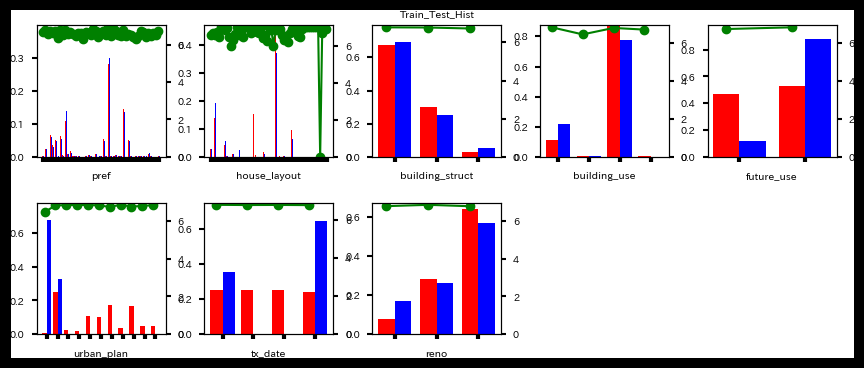

In [ ]:
trgt_y = "log_price"
object_cols = []
for col in tr_df:
    if tr_df[col].dtype == "O":
        object_cols.append(col)


cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=object_cols, row_num=4, col_num=5, bins=10)

station_dist
area
bc_ratio
fa_ratio
log_price
layout_l
layout_d
layout_k
layout_s
building_age


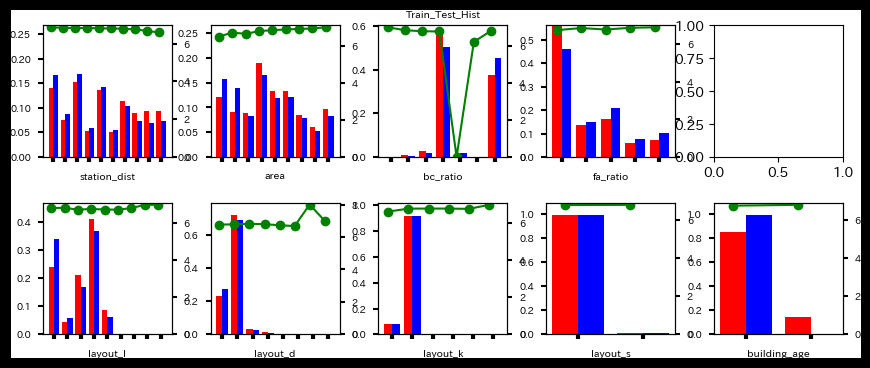

In [ ]:
trgt_y = "log_price"
not_object_cols = []
for col in tr_df:
    if tr_df[col].dtype != "O":
        not_object_cols.append(col)


cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=not_object_cols, row_num=4, col_num=5, bins=10)

In [ ]:
def check_na(inp_df):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            n_nan= df[col].isna().sum()
            print(f"NaNは{n_nan}個あります。")
        else:
            print("NaNなし")
        print("------------------\n")


def check_and_clean_na(inp_df, fill_na=False):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            if fill_na:
                df[col] = df[col].fillna(df[col].mean())
            else:
                df = df.dropna(subset=[col])
        else:
            print("NaNなし")
        print("------------------\n")

    return df

In [ ]:
tr_df[object_cols] = tr_df[object_cols].astype("category")
test_df[object_cols] = test_df[object_cols].astype("category")

In [ ]:
exam_id = 1
base_path = Path('/content/drive/MyDrive/nishika/mansion_autumn_2024/')
tmp_dir = base_path / "data/cleaned_data"
tmp_dir.mkdir(parents=True, exist_ok=True)
with open(base_path / f"data/cleaned_data/cleaned_tr_df_exam_{exam_id}.pickle", 'wb') as f:
    pickle.dump(tr_df, f)
with open(base_path / f"data/cleaned_data/cleaned_test_df_exam_{exam_id}.pickle", 'wb') as f:
    pickle.dump(test_df, f)

## pythonファイル

In [15]:
! python3 /content/drive/MyDrive/nishika/mansion_autumn_2024/utility/main.py 1

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/////  single model 訓練中... //////
xgbreg を使用しています...
	optimal hyperparameters using Optuna　探索中...
///// now... single_only //////
///// search for xgbreg /////
[I 2024-12-02 09:05:59,356] A new study created in RDB with name: study_ens_single_only_xgbreg

◎ single_only_xgbreg_GLOBAL_TRIAL_1 strat...
[I 2024-12-02 09:05:59,461] A new study created in memory with name: no-name-e170055d-5787-48da-9172-1c19dafdb8bf
[I 2024-12-02 09:05:59,462] A new study created in memory with name: no-name-f4beaf5a-7099-405e-a4ce-9859389b4d72
[I 2024-12-02 09:05:59,462] A new study created in memory with name: no-name-b8629fec-0d3c-4599-943e-2880bd2bce53
xgbreg
search_params(local_opt_params)

In [17]:
base_path = Path('/content/drive/MyDrive/nishika/mansion_autumn_2024/')
with open(base_path / "output/exp/exp_1/run_17/tr_df.pickle", 'rb') as f:
    s_tr_df = pickle.load(f)

with open(base_path / "output/exp/exp_1/run_17/test_df.pickle", 'rb') as f:
    s_test_df = pickle.load(f)

with open(base_path / "output/exp/exp_1/run_17/output_path.pickle", 'rb') as f:
    output_path = pickle.load(f)

In [45]:
output_path

PosixPath('/content/drive/MyDrive/nishika/mansion_autumn_2024/output/exp/exp_1/run_17')

In [ ]:
# base_path = Path('/content/drive/MyDrive/nishika/mansion_autumn_2024/')
# with open(base_path / "output/exp/exp_1/run_1/meta_tr_df.pickle", 'rb') as f:
#     meta_tr_df = pickle.load(f)

# with open(base_path / "output/exp/exp_1/run_1/meta_test_df.pickle", 'rb') as f:
#     meta_test_df = pickle.load(f)

# with open(base_path / "output/exp/exp_1/run_1/output_path.pickle", 'rb') as f:
#     output_path = pickle.load(f)

In [18]:
s_tr_df[:3]

,id,pref,station_dist,house_layout,area,building_struct,building_use,future_use,urban_plan,bc_ratio,fa_ratio,tx_date,reno,log_price,layout_l,layout_d,layout_k,layout_s,building_age,log_price_pred
0,1016963.0,北海道,4.0,1DK,20,SRC,住宅,住宅,商業,80,400,第4四半期,改装済み,6.301030,3,1,1,0,0,6.832277
1,1058309.0,北海道,45.0,3LDK,145,SRC,住宅,その他,１中住専,60,200,第2四半期,未改装,7.000000,4,1,1,0,0,7.186118
2,1002325.0,北海道,11.0,4LDK,95,RC,住宅,その他,商業,80,400,第1四半期,未改装,7.462398,3,1,1,0,0,7.274327


In [20]:
from sklearn.metrics import mean_absolute_error

def eval_mae_score(tr_df):
    score = mean_absolute_error(tr_df.log_price.values, tr_df.log_price_pred.values)
    return score

eval_mae_score(s_tr_df)

0.1841748578512467

In [49]:
def save_submit(output_path, trgt_df, trgt_y, row_sample_df):
    submit_df = row_sample_df.copy()
    exam_id = re.findall("exp_(\d)", str(output_path))[0]
    run_id = re.findall("run_(\d{1,3})", str(output_path))[0]
    save_path = output_path / f"submit_exam_{exam_id}_{run_id}.csv"

    df = trgt_df[["id", f"{trgt_y}_pred"]]
    df = df.rename(columns={"id": "ID", f"{trgt_y}_pred": "取引価格（総額）_log"})
    submit_df.drop("取引価格（総額）_log", axis=1, inplace=True)
    submit_df = pd.merge(submit_df, df, on="ID", how="left")
    # submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    submit_df.to_csv(save_path, encoding="shift_jis", index=False)
    return submit_df

save_submit(output_path, s_test_df, "log_price", sample_df)

,ID,取引価格（総額）_log
0,1000101,7.180647
1,1000102,7.184986
2,1000103,7.099203
3,1000105,7.041889
4,1000106,6.838773
...,...,...
19385,47016501,7.168709
19386,47016502,7.139694
19387,47016792,7.217576
19388,47016793,7.159511


In [39]:
sample_df.ID[:10]

,ID
0,1000107
1,1000109
2,1000110
3,1000114
4,1000117
5,1000120
6,1000123
7,1000124
8,1000131
9,1000327


In [40]:
s_test_df.id[:10]

,id
0,1000101
1,1000102
2,1000103
3,1000105
4,1000106
5,1000111
6,1000238
7,1000242
8,1000246
9,1000250


In [ ]:
def save_submit(df):


In [21]:
sample_df

,ID,取引価格（総額）_log
0,1000107,0
1,1000109,0
2,1000110,0
3,1000114,0
4,1000117,0
...,...,...
19116,47004816,0
19117,47005043,0
19118,47005161,0
19119,47005427,0


AUC:  0.9478772632833459


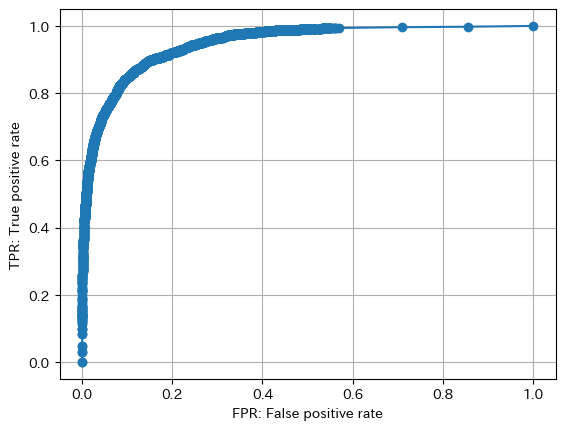

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc(meta_tr_df, meta_test_df, trgt_y):
    y_true = meta_tr_df[f"{trgt_y}"]
    y_score = meta_tr_df[f"{trgt_y}_pred_proba"]
    auc_score = roc_auc_score(y_true, y_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.grid()

    return auc_score
auc_score = plot_roc(meta_tr_df, meta_test_df, "y")
print("AUC: ", auc_score )

In [ ]:
str(output_path)

'/content/drive/MyDrive/signate/beginner_no52/output/exp/exp_1/run_1'

In [ ]:
# import re
# # tmp = re.findall("exp_.*", str(output_path))[0]
# # tmp_1, tmp_2 = tmp.split("/")
# re.findall("exp_(\d)", str(output_path))[0]
# re.findall("run_(\d)", str(output_path))[0]

'1'

In [ ]:
def save_submit(output_path, trgt_df, trgt_y, row_sample_df):
    submit_df = row_sample_df.copy()
    exam_id = re.findall("exp_(\d)", str(output_path))[0]
    run_id = re.findall("run_(\d)", str(output_path))[0]
    df = trgt_df[["id", f"{trgt_y}_pred_proba"]]
    save_path = output_path / f"submit_exam_{exam_id}_{run_id}.csv"
    submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=None)
    return submit_df

save_submit(output_path, meta_test_df, "y", row_sample_df)

,0,1
0,0,0.837638
1,1,0.050738
2,2,0.053655
3,3,0.022578
4,4,0.023180
...,...,...
18045,18045,0.022578
18046,18046,0.022578
18047,18047,0.171839
18048,18048,0.022578


## けさない

In [ ]:
def eval_score(inp_df, trgt_y, threshold):
    df = inp_df.copy()
    df[f"{trgt_y}_pred"] = df[f"{trgt_y}_pred_proba"].apply(lambda x: 1 if x >= threshold else 0)
    # print(df)
    tp_tn = df[df[f"{trgt_y}"] == df[f"{trgt_y}_pred"]].shape[0]
    total_n = df.shape[0]
    print(tp_tn / total_n)

    from sklearn.metrics import f1_score
    f1_value = f1_score(df[f"{trgt_y}"], df[f"{trgt_y}_pred"])
    print("f1スコア：", f1_value)

    return df

meta_tr_df_2 = ens_clsfs.meta_tr_df.copy()
meta_test_df_2 = ens_clsfs.meta_test_df.copy()
trgt_y = "prodtaken"
threshold = 0.5
meta_tr_df_2 = eval_score(meta_tr_df_2, trgt_y, threshold)
meta_test_df_2[f"{trgt_y}_pred"] = meta_test_df_2[f"{trgt_y}_pred_proba"].apply(lambda x: 1 if x >= threshold else 0)

0.970991890205864
f1スコア： 0.8934707903780069


In [ ]:
meta_tr_df_2.head()

,id,xgbclsf_pred_proba,lgbclsf_pred_proba,catclsf_pred_proba,prodtaken,prodtaken_pred_proba,prodtaken_pred
0,0,0.985692,0.492196,0.487579,1,0.972457,1
1,1,0.007039,0.090785,0.192115,0,0.000080,0
2,3,0.017048,0.108343,0.146098,0,0.000418,0
3,4,0.269322,0.286567,0.350988,1,0.284993,0
4,5,0.395655,0.424208,0.394830,0,0.246800,0


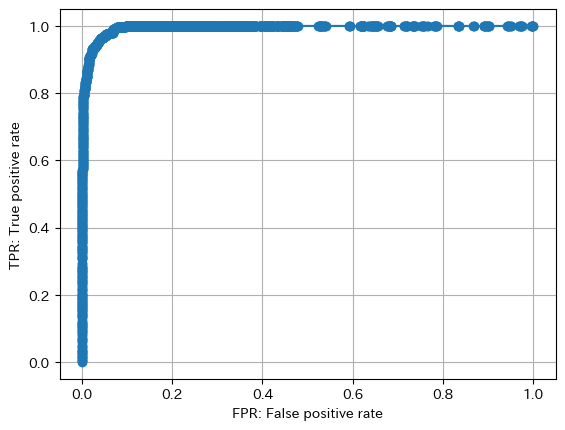

In [ ]:
from sklearn.metrics import roc_curve
y_true = meta_tr_df_2.prodtaken
y_score = meta_tr_df_2.prodtaken_pred_proba
fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [ ]:
def save_submit(ens_clsfs, base_path, sample_submit_df):
    submit_df = sample_submit_df.copy()
    trgt_y = ens_clsfs.trgt_y
    df = ens_clsfs.meta_test_df
    df = df[["id", f"{trgt_y}_pred_proba"]]
    trgt_ymd = ens_clsfs.trgt_ymd
    exam_id = ens_clsfs.exam_id
    base_path = base_path
    save_dir = base_path / f'save/save_submit/{trgt_ymd}'
    if not save_dir.exists():
        save_dir.mkdir(parents=True, exist_ok=True)

    study_exam_dir = save_dir / f'exam_no_{exam_id}'
    study_exam_dir.mkdir(parents=True, exist_ok=True)

    save_path = study_exam_dir / f"submit_{trgt_ymd}_{exam_id}.csv"
    submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=None)
    return submit_df

In [ ]:
df = save_submit(ens_clsfs, base_path, row_sample_df)

In [ ]:
df

,0,1
0,3489,0.001541
1,3490,0.023104
2,3491,0.178151
3,3492,0.919114
4,3493,0.013959
...,...,...
3484,6973,0.013914
3485,6974,0.000537
3486,6975,0.948080
3487,6976,0.058842


In [ ]:
row_sample_df = pd.read_csv("/content/drive/MyDrive/signate/signate_cup_2024/data/sample_submit.csv", header=None)
row_sample_df

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451
...,...,...
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451


In [ ]:
row_sample_df[1] = df[1]

,id,age,citytier,durationofpitch,gender,numberofpersonvisiting,numberoffollowups,preferredpropertystar,numberoftrips,passport,pitchsatisfactionscore,monthlyincome,is_married,has_car,has_child,occupation_encd,typeofcontact_encd,productpitched_encd,designation_encd
0,3489,48.0,2,780.0,0,1.0,4.0,3.0,7.0,0,3,496950.0,1,1,0,0.16,0.12,0.09,0.08
1,3490,30.0,2,720.0,1,1.0,4.0,3.0,4.0,1,3,300000.0,1,0,0,0.16,0.12,0.09,0.09
2,3491,25.0,1,540.0,1,1.0,4.0,3.0,1.0,0,3,260000.0,0,0,0,0.10,0.12,0.30,0.31
3,3492,21.0,2,420.0,0,1.0,4.0,4.0,1.0,0,3,259875.0,0,0,0,0.10,0.18,0.30,0.09
4,3493,41.0,1,420.0,0,1.0,4.0,3.0,1.0,0,4,268830.0,0,1,0,0.10,0.18,0.30,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,6973,41.0,1,840.0,1,1.0,3.0,3.0,2.0,0,4,261840.0,1,0,0,0.16,0.18,0.30,0.31
3485,6974,44.0,1,2100.0,0,3.0,5.0,3.0,3.0,0,3,349770.0,1,0,1,0.10,0.18,0.03,0.04
3486,6975,24.0,2,1260.0,0,2.0,3.0,3.0,2.0,0,3,270000.0,0,0,0,0.16,0.12,0.30,0.31
3487,6976,25.0,1,540.0,0,2.0,3.0,3.0,2.0,0,3,272430.0,1,0,1,0.16,0.12,0.30,0.31


In [ ]:
ens_clsfs.meta_tr_df

,id,xgbclsf_pred,lgbclsf_pred,catclsf_pred,prodtaken,prodtaken_pred
0,0,1.0,1.0,0.0,1,1.0
1,1,0.0,0.0,0.0,0,0.0
2,3,0.0,0.0,0.0,0,0.0
3,4,1.0,0.0,0.0,1,1.0
4,5,1.0,1.0,0.0,0,1.0
...,...,...,...,...,...,...
3201,3484,1.0,0.0,0.0,1,1.0
3202,3485,0.0,0.0,0.0,0,0.0
3203,3486,0.0,0.0,0.0,0,0.0
3204,3487,1.0,0.0,0.0,1,1.0


In [ ]:
row_sample_df

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451
...,...,...
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451


In [ ]:
row_sample_df

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451
...,...,...
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451


In [ ]:
row

In [ ]:
df.prodtaken_pred.value_counts()

,count
prodtaken_pred,
0,3086
1,109


In [ ]:
tr_df

,id,age,citytier,durationofpitch,gender,numberofpersonvisiting,numberoffollowups,preferredpropertystar,numberoftrips,passport,pitchsatisfactionscore,monthlyincome,prodtaken,is_married,has_car,has_child,occupation_encd,typeofcontact_encd,productpitched_encd,designation_encd
0,0,50.0,2,900.0,0,1.0,4.0,3.0,5.0,1,4,253905.0,1,0,0,0,0.23,0.12,0.30,0.31
1,1,56.0,1,840.0,0,1.0,4.0,3.0,2.0,1,4,404475.0,0,0,0,0,0.10,0.18,0.09,0.09
3,3,37.0,2,1080.0,1,1.0,3.0,4.0,1.0,0,5,326805.0,0,0,1,0,0.16,0.12,0.09,0.09
4,4,48.0,3,1020.0,1,1.0,3.0,4.0,4.0,0,4,258435.0,1,0,1,0,0.16,0.18,0.30,0.31
5,5,19.0,2,960.0,0,1.0,3.0,3.0,2.0,0,4,260000.0,0,0,0,0,0.16,0.12,0.30,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3484,40.0,2,1560.0,0,2.0,3.0,3.0,3.0,0,1,258900.0,1,0,1,0,0.10,0.12,0.30,0.31
3485,3485,40.0,1,540.0,0,3.0,3.0,5.0,5.0,0,3,260415.0,0,1,1,0,0.23,0.12,0.30,0.31
3486,3486,31.0,1,840.0,1,3.0,2.0,3.0,5.0,0,4,317340.0,0,0,1,1,0.16,0.12,0.09,0.09
3487,3487,56.0,2,900.0,0,3.0,6.0,3.0,7.0,1,4,527910.0,1,1,0,0,0.10,0.18,0.06,0.06


In [ ]:
meta_tr_df = ens_clsfs.meta_tr_df.copy()
meta_test_df = ens_clsfs.meta_test_df.copy()

In [ ]:
meta_tr_df.columns

Index(['id', 'xgbclsf_pred', 'lgbclsf_pred', 'catclsf_pred', 'attrition',
       'attrition_pred'],
      dtype='object')

In [ ]:
meta_tr_df[meta_tr_df["attrition"] == meta_tr_df["attrition_pred"]].shape[0]

1198

In [ ]:
meta_tr_df.shape[0]

1200

In [ ]:
meta_test_df

,id,xgbclsf_pred,lgbclsf_pred,catclsf_pred,attrition_pred
49,113,1.0,0.000000,0.000000,1.0
174,427,1.0,0.000000,0.000000,1.0
185,452,1.0,0.000000,0.000000,1.0
213,517,1.0,0.000000,0.000000,1.0
226,536,1.0,0.000000,0.000000,1.0
256,597,1.0,0.000000,0.000000,1.0
298,711,1.0,0.000000,0.000000,1.0
317,759,1.0,0.000000,0.000000,1.0
346,831,1.0,0.000000,0.000000,1.0
350,841,1.0,0.000000,0.000000,1.0


In [ ]:
ens_clsfs.exam_id

3

In [ ]:
ens_clsfs.trgt_ymd

'2024_10_8'

In [ ]:
# def save_results(df, exam_id, exam_year, exam_month, exam_day):
def save_submit(ens_clsfs, base_path):
    df = ens_clsfs.meta_test_df
    df = df[["id", "attrition_pred"]]
    df["attrition_pred"] = df["attrition_pred"].apply(lambda x: int(x))
    df = df.rename(columns={"id": 1, "attrition_pred": 0})
    trgt_ymd = ens_clsfs.trgt_ymd
    exam_id = ens_clsfs.exam_id
    # base_path = Path('/content/drive/MyDrive/nishika/mansion_spring_2024')
    # trgt_ymd = f'{exam_year}_{exam_month}_{exam_day}'
    base_path = base_path
    save_dir = base_path / f'save/save_submit/{trgt_ymd}'
    if not save_dir.exists():
        save_dir.mkdir(parents=True, exist_ok=True)
    # 自動でidを振るには工夫がいる
    # exam_id = len(list(save_dir.iterdir()))+1
    # ptrn = re.compile(r'(\d{1,3})')
    # max_id = 0
    # for iter in save_dir.iterdir():
    #     tmp_lst = ptrn.findall(str(iter))
    #     tmp_id = tmp_lst[-1]
    #     if not tmp_id.isdigit():
    #         continue;
    #     tmp_id = int(tmp_id)
    #     if tmp_id > max_id:
    #         max_id = tmp_id
    # exam_id = max_id + 1
    # exam_id = exam_id
    study_exam_dir = save_dir / f'exam_no_{exam_id}'
    study_exam_dir.mkdir(parents=True, exist_ok=True)
    # save_path = study_exam_dir / f"submit.pkl"
    # with open(save_path, "wb") as f:
    #     pickle.dump(df, f)
    save_path = study_exam_dir / f"submit_{trgt_ymd}_{exam_id}.csv"
    df.to_csv(save_path, encoding="shift_jis", index=False)
    return df

In [ ]:
save_submit(ens_clsfs, base_path)

<ipython-input-75-1110d0f60ba2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["attrition_pred"] = df["attrition_pred"].apply(lambda x: int(x))


,1,0
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
795,1991,0
796,1992,0
797,1993,0
798,1995,0


In [ ]:
save_results(sample_df, ens_regs.exam_id, ens_regs.exam_year,
             ens_regs.exam_month, ens_regs.exam_day)

In [ ]:
def save_submit_csv(submit_df):
    base_path = Path('/content/drive/MyDrive/nishika/mansion_winter_2023')
    save_study_dir = base_path / 'save/save_study'
    tmp_lst = [child for child in save_study_dir.iterdir() if child.is_dir()]
    tmp_lst = list(map(lambda x: x.parts[-1], tmp_lst))
    tmp_lst = sorted(tmp_lst, key=lambda x: tuple(map(int, x.split('_'))), reverse=True)
    latest_date = tmp_lst[0]
    latest_date_dir = save_study_dir / latest_date
    ptrn = re.compile(r'(\d{1,3})')
    max_id = 0
    for iter in latest_date_dir.iterdir():
        tmp_lst = ptrn.findall(str(iter))
        tmp_id = tmp_lst[-1]
        if not tmp_id.isdigit():
            continue;
        tmp_id = int(tmp_id)
        if tmp_id > max_id:
            max_id = tmp_id
    exam_id = max_id
    exam_id_path = latest_date_dir / str(exam_id)
    # print(latest_date)
    save_dir = base_path / f'save/save_submit/{latest_date}/exam_no_{exam_id}'
    save_dir.mkdir(parents=True, exist_ok=True)
    file_name =  f'{latest_date}_{exam_id}.csv'
    save_path = save_dir / file_name
    submit_csv = submit_df.to_csv(save_path, encoding="shift_jis", index=False)

In [ ]:
optuna.trial.Trial.suggest_categorical(f'hidden_dim_1', [10, 100])

In [ ]:
import sklearn
print(f'Scikit-learn version: {sklearn.__version__}')